In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
# x_train = tf.convert_to_tensor(train_images)
# y_train = tf.convert_to_tensor(train_labels)
# x_test = tf.convert_to_tensor(test_images)
# y_test = tf.convert_to_tensor(test_labels)

In [ ]:
print('Number of images in the training dataset:', train_images.shape[0])
print('Number of images in the testing dataset:', test_images.shape[0])

Number of images in the training dataset: 60000
Number of images in the testing dataset: 10000


In [ ]:
print(f"Shape of the images in the training dataset: {train_images[0].shape}")

Shape of the images in the training dataset: (28, 28)


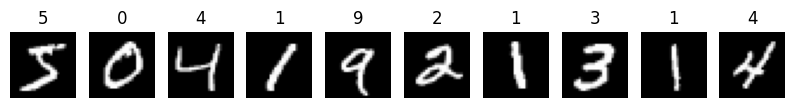

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axes[i].imshow(train_images[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(train_labels[i])
    axes[i].axis('off')
plt.show()

In [ ]:
# physical_devices = tf.config.list_physical_devices('GPU')
gpus = tf.config.list_physical_devices('GPU')
print(gpus)

[]


In [ ]:
def move_model_to_gpu(model):
    """
    Moves a TensorFlow model to the GPU if available.

    Parameters:
        model (tf.keras.Model): The TensorFlow model to move to the GPU.

    Returns:
        tf.keras.Model: The model moved to the GPU, or the original model if GPU is not available.
    """
    # Check if GPU is available
    if tf.config.list_physical_devices('GPU'):
        # If GPU is available, move the model to GPU
        with tf.device('/GPU:0'):
            gpu_model = model
        print("Model moved to GPU.")
    else:
        gpu_model = model
        print("No GPU available. Model remains on CPU.")

    return gpu_model


In [ ]:
# model = models.Sequential([
#     layers.Flatten(input_shape=(28, 28, 1)),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])

model = tf.keras.Sequential([
        # Convolutional Layer 1
        tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1), padding="valid"),
        tf.keras.layers.AvgPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

        # Convolutional Layer 2
        tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'),
        tf.keras.layers.AvgPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

        # Convolutional Layer 2
        # tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), activation='relu', padding='valid'),
        # tf.keras.layers.AvgPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

        # Fully Connected Layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=120, activation='relu'),
        tf.keras.layers.Dense(units=84, activation='relu'),
        tf.keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
model =  move_model_to_gpu(model)

No GPU available. Model remains on CPU.


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_images,
    train_labels,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2178 - accuracy: 0.9343
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0732 - accuracy: 0.9772
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0522 - accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0411 - accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0348 - accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0269 - accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 8/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0207 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0178 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 25s 13m

In [ ]:
def view_classify(image, probabilities):
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(image)
    ax1.axis('off')
    ax2.barh(np.arange(10), probabilities)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

1/1 [==============================] - 0s 255ms/step


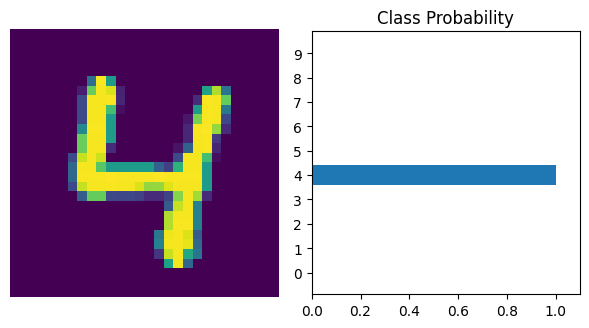

In [ ]:
image, label = test_images[56], test_labels[65]
probabilities = model.predict(image.reshape(1, 28, 28, 1))
view_classify(image,  probabilities[0])

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Accuracy of the neural network on the {test_images.shape[0]} test images: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 4s 12ms/step - loss: 0.0406 - accuracy: 0.9877
Accuracy of the neural network on the 10000 test images: 98.77%


In [ ]:
model.save("lenet5_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tkinter as tk
from tkinter import Canvas
from PIL import Image, ImageDraw
import numpy as np

In [ ]:
model1 = tf.keras.models.load_model('lenet5_model.h5')